In [40]:
# importando libs essenciais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
# carregando os dados em um dataframe pandas
dataset = pd.read_csv("dataset.csv", sep=",")
dataset.head(10)

,avaliacao_1,idade,categoria_rubrica
0,33.346989,47,Nivel_2
1,8.828231,37,Nivel_4
2,82.321630,35,Nivel_3
3,10.230485,26,Nivel_1
4,71.719123,34,Nivel_2
5,31.378527,51,Nivel_3
6,83.769444,42,Nivel_1
7,9.155384,23,Nivel_1
8,17.912020,46,Nivel_2
9,80.219518,41,Nivel_2


In [42]:
# preprocessamento dos dados categóricos (categoria_rubrica)
X = pd.get_dummies(dataset, columns=["categoria_rubrica"])
X.head(10)

,avaliacao_1,idade,categoria_rubrica_Nivel_1,categoria_rubrica_Nivel_2,categoria_rubrica_Nivel_3,categoria_rubrica_Nivel_4
0,33.346989,47,0,1,0,0
1,8.828231,37,0,0,0,1
2,82.321630,35,0,0,1,0
3,10.230485,26,1,0,0,0
4,71.719123,34,0,1,0,0
5,31.378527,51,0,0,1,0
6,83.769444,42,1,0,0,0
7,9.155384,23,1,0,0,0
8,17.912020,46,0,1,0,0
9,80.219518,41,0,1,0,0


In [43]:
# agrupando os dados preprocessados
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [44]:
# visualizando os labels
model.labels_

array([1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2,
       0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1], d

In [61]:
# criando uma coluna com os labels no conjunto de dados original
dataset["labels"] = model.labels_

<AxesSubplot:xlabel='categoria_rubrica', ylabel='Count'>

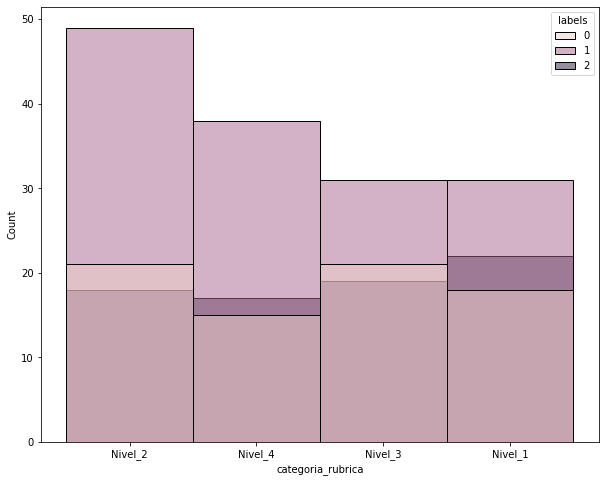

In [63]:
# plot de categorias dentro de cada grupo criado
plt.figure(figsize=(10, 8))
sns.histplot(data=dataset, x="categoria_rubrica", hue="labels")